# **Τεχνητή Νοημοσύνη 2**
#**Εργασία 2**
Στέφανος Μπακλαβάς 1115201700093


In [2]:
#change the following lines in order to change test and validation sets


from google.colab import drive
drive.mount("/content/drive")

import nltk
nltk.download('stopwords')
!pip install --upgrade gensim
!pip install python-Levenshtein


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


!pip install beautifulsoup4
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from datetime import datetime

from bs4 import BeautifulSoup

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import f1_score



!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip
%matplotlib inline 


Mounted at /content/drive
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 50 kB 2.6 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149864 sha256=5e6ca5c4afea2650d723135c788ec5107bfde9da4a48e111ec89f21d6d297e07
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
--2021-12-23 14:17:26--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 30

In [3]:

!pip install torchvision 

import torch
import torchvision

In [4]:
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from datetime import datetime

from bs4 import BeautifulSoup

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import f1_score
vaccine_train_set = r'/content/drive/MyDrive/Colab Notebooks/AI_2/AI_2_HW1/vaccine_train_set.csv'
vaccine_validation_set = r'/content/drive/MyDrive/Colab Notebooks/AI_2/AI_2_HW1/vaccine_validation_set.csv'


## Reading the datasets


In [66]:
df_train = pd.read_csv(vaccine_train_set)
df_validation = pd.read_csv(vaccine_validation_set)


## Data Pre-processing


Παρακάτω γίνεται η εξής προεπεξεργασία στα δεδομένα:

1.   Απαλοιφή των σημείων στίξης και διάφορων άλλων χαρακτήρων
2.   Καθαρισμός των πολλών κενών διαστημάτων και αντικατάστασή τους με ένα κενό
3.   Μετατροπή όλων των γραμμάτων σε πεζά


In [67]:
from nltk.stem.snowball import SnowballStemmer
import re

stemmer = SnowballStemmer("english")


df_train['tweet'] = df_train['tweet'].str.translate({ord(i): " " for i in ',–#%$&*()@''-‘"":.!?/'})
df_train.columns = df_train.columns.str.replace('  ', ' ')
df_train['tweet'] = df_train['tweet'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df_train['tweet'] = df_train['tweet'].str.lower()
#df_train['tweet'] = df_train['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])
#df_train['tweet'] = df_train['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#df_train['tweet'] = df_train['tweet'].str.replace('\d+', '')


df_validation['tweet'] = df_validation['tweet'].str.translate({ord(i): " " for i in ',–#%$&*()@''-‘"":.!?/'})
df_validation.columns = df_validation.columns.str.replace('  ', ' ')
df_validation['tweet'] = df_validation['tweet'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df_validation['tweet'] = df_validation['tweet'].str.lower()
#df_validation['tweet'] = df_validation['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])
#df_validation['tweet'] = df_validation['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#df_validation['tweet'] = df_validation['tweet'].str.replace('\d+', '')



## Reading and making of the golove embedding


In [7]:


glove = pd.read_csv('glove.twitter.27B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)



In [8]:
glove_embedding = {key: val.values for key, val in glove.T.items()}

## Creating the final train and validation sets:

For each word in each tweet we find its glove_vector and then we save the mean of each tweet vector of words to the training or validation set.If a word has no representation in glove_vectors we represent it as the mean vector of the tweet that it comes.If a tweet has no word in glove_vectors we represent it as a zero vector.


In [68]:



def create_tweets_average_vectors(df,glove_embedding,dimension):  
  
  tweets_vector = []
  counter1 = 0
  counter2 = 0
  for tweet in df['tweet']:
    l = []
    for word in tweet:
      if word in glove_embedding.keys():
        val = glove_embedding[word]
        l.append(val)
        counter1=counter1+1
      else: 
        if len(l) != 0:
          avg = np.array(l)  
          avg = np.average(avg,axis=0)
          l.append(avg)
          counter2 = counter2+1
        else:
          l.append([0]*dimension) 
    
    n = np.array(l)  
    n = np.average(n,axis=0)
    tweets_vector.append(n)

  return tweets_vector    




train_tweets_vector = create_tweets_average_vectors(df_train,glove_embedding,50)
validation_tweets_vector = create_tweets_average_vectors(df_validation,glove_embedding,50)




In [11]:
print(df_train['label'].shape)
print(df_validation['label'].shape)

(15976,)
(2282,)


# Preparing datasets for the model

In [12]:


X_train = train_tweets_vector
X_validation = validation_tweets_vector

y_train = df_train['label']
y_validation = df_validation['label']


X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.long)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_validation = torch.tensor(X_validation, dtype=torch.float)
y_validation = torch.tensor(y_validation.values, dtype=torch.long)

print(f"X_validation shape: {X_validation.shape}")
print(f"y_validation shape: {y_validation.shape}")


X_train shape: torch.Size([15976, 50])
y_train shape: torch.Size([15976])
X_validation shape: torch.Size([2282, 50])
y_validation shape: torch.Size([2282])
Using cpu device


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  # Remove the CWD from sys.path while we load stuff.


## Defining model: 
After a lot of test we found that we are getting the best results by using 3 Linear hidden layers and RelU activation function.We would have aslo used softmax in the output but it is added by the nn.CrossEntropyLoss function.

In [61]:
# Define model
class NN(nn.Module):
    def __init__(self,inp,h1,h2,h3,out):
        super(NN, self).__init__()
       
        self.flatten = nn.Flatten()
        self.activation_func = nn.Sequential(
            nn.Linear(inp,h1),
            nn.ReLU(),
            nn.Linear(h1,h2),
            nn.ReLU(),
            nn.Linear(h2,h3),
            nn.ReLU(),
            nn.Linear(h3,out),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.activation_func(x)
        return logits

# Initializing model 

In [62]:
from sklearn.utils.class_weight import compute_class_weight
import keras

torch.manual_seed(1)
np.random.seed(1)

inp = X_train.shape[1]
h1 = 256
h2 = 128
h3 = 64
out = 3


l = []
for row in y_train:
  l.append(row)

classess = np.array([0, 1, 2])
weights = compute_class_weight(
                                        class_weight = 'balanced',
                                        classes = classess,
                                        y = yn                                                    
                                    )


weights = torch.tensor(weights, dtype=torch.float)
#Define Hyperparameters
learning_rate = 1e-1

#initialize model,loss,optimizer
model = NN(inp, h1, h2,h3, out)
loss_func = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)   

#Initialize dataloader
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=64, shuffle=True)

#validation
dataset_validation = torch.utils.data.TensorDataset(X_validation, y_validation)
dataloader_validation = torch.utils.data.DataLoader(dataset_validation, batch_size=32, shuffle=True)


print(weights)

tensor([0.7140, 2.5689, 0.8263])


# Training and Evaluation of the model:
Because of the low learning rate we need 600 epochs to reach to the best result with these parameters

In [63]:
from numpy.core.fromnumeric import argmax
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from scipy.special import softmax
import warnings
warnings.filterwarnings('always')

def Average(lst):
    return sum(lst) / len(lst)

train_loss = []
validation_loss = []
epochs = []
fpr = dict()
tpr = dict()
roc_auc = dict()
best_epoch_preds = []
best_epoch_y_values = []
prev_max_presicion = 0

for epoch in range(600):
  
  batch_losses_train = []
  batch_losses_validation = []

  preds = []
  y_values = []

  model.train()

  for x_batch, y_batch in dataloader_train:
      y_pred = model(x_batch)
      loss = loss_func(y_pred, y_batch)
      batch_losses_train.append(loss.item())
      #model.val
      #Delete previously stored gradients
      optimizer.zero_grad()
      #Perform backpropagation starting from the loss calculated in this epoch
      loss.backward()
      #Update model's weights based on the gradients calculated during backprop
      optimizer.step()


  train_loss.append(Average(batch_losses_train))
  batch_losses_train.clear

  model.eval()

  for x_batch, y_batch in dataloader_validation:
    y_pred = model(x_batch)
    #print(y_pred)
    

    loss = loss_func(y_pred, y_batch)

    y_pred = y_pred.detach().numpy()
    y_pred = softmax(y_pred)
    y_batch = y_batch.detach().numpy()

    for pred in y_pred:
      preds.append(argmax(pred))
    for val in y_batch:
      y_values.append(val)   

    
    batch_losses_validation.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()



  epochs.append(epoch)
  validation_loss.append(Average(batch_losses_validation))

  f1 = f1_score(y_values,preds,average='weighted',labels=np.unique(preds))
  print('F1 score: ',f1)
  precision = precision_score(y_values,preds, average='weighted',labels=np.unique(preds))
  print('Precision score: ',precision)

  if precision > prev_max_presicion:
    prev_max_presicion = precision
    prev_max_f1 = f1
    best_epoch_preds = preds.copy()
    best_epoch_y_values = y_values.copy()
    print("here")

  
  output = set(y_values) - set(preds)
  print(output)
  preds.clear()
  y_values.clear()
  batch_losses_validation.clear


best_epoch_y_values = label_binarize(best_epoch_y_values,classes = [0,1,2])
best_epoch_preds = label_binarize(best_epoch_preds,classes = [0,1,2])

#for val in best_epoch_y_values:

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(best_epoch_y_values[:, i], best_epoch_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])





# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(best_epoch_y_values.ravel(), best_epoch_preds.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(prev_max_f1)
print(prev_max_presicion)


F1 score:  0.3899384063564411
Precision score:  0.3979659927709727
here
set()
F1 score:  0.39401797378967807
Precision score:  0.3920037772109152
set()
F1 score:  0.43811523459546287
Precision score:  0.4187816997623329
here
set()
F1 score:  0.42607833141089424
Precision score:  0.42425281183339403
here
set()
F1 score:  0.43901011072255886
Precision score:  0.4326595955302746
here
set()
F1 score:  0.44462996795519516
Precision score:  0.434300233667526
here
set()
F1 score:  0.4277289033043557
Precision score:  0.4506665466247591
here
set()
F1 score:  0.43611875090468233
Precision score:  0.45259312552866604
here
set()
F1 score:  0.4497943038703262
Precision score:  0.447093384901458
set()
F1 score:  0.44838735640529853
Precision score:  0.4540587515946163
here
set()
F1 score:  0.449451229206793
Precision score:  0.46333826883242235
here
set()
F1 score:  0.4599462263422588
Precision score:  0.4752165764778014
here
set()
F1 score:  0.4217067406764527
Precision score:  0.46682393990203463

# Plot ROC curve of best model:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

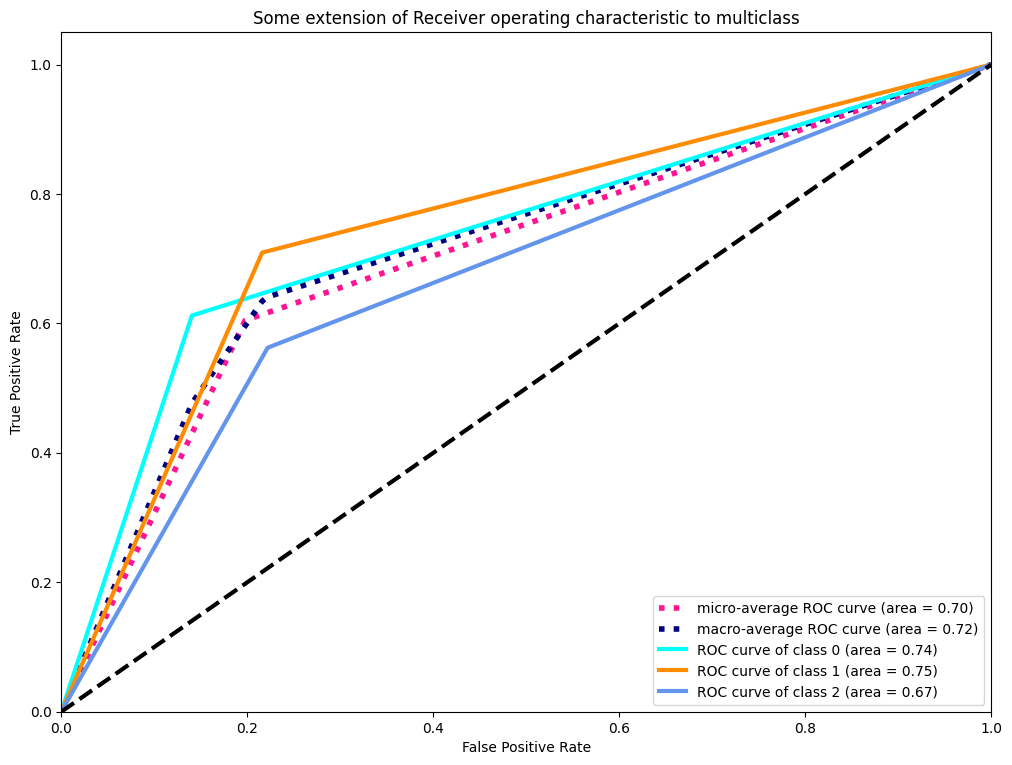

In [65]:
#code taken from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
lw = 3
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
figure(figsize=(12,9),dpi=100)

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# Plot loss vs epochs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

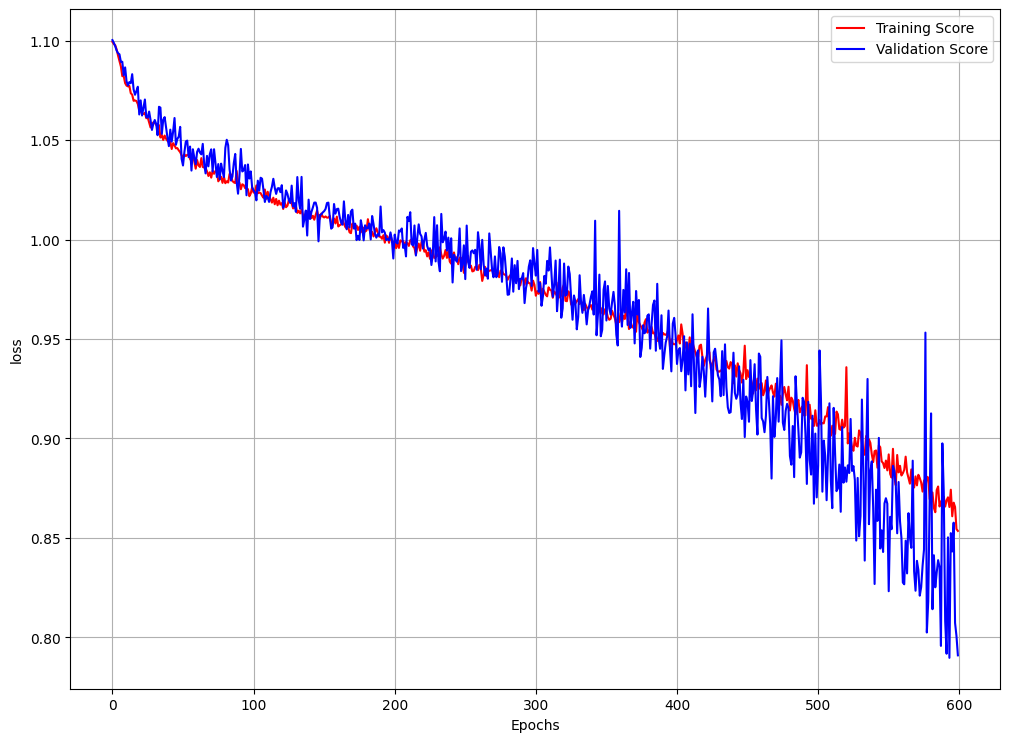

In [64]:

figure(figsize=(12,9),dpi=100)
plt.plot(epochs,train_loss,'r',label='Training Score',)
plt.plot(epochs,validation_loss,'b',label='Validation Score')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid()
plt.legend()



